In [2]:
from rembg import remove
from PIL import Image

In [28]:
input_path = '/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/1.png'
output_path = "/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/5.png"
input_path2 = '/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/1.png'
output2= "/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/7.png"

In [5]:
input = Image.open(input_path)
output = remove(input)

output.save(output_path)

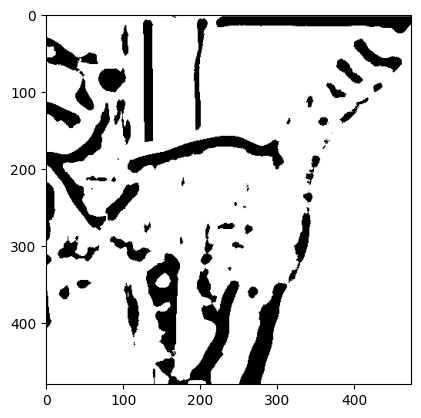

In [7]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

#image_path = "image_test/chien.jpeg"
pil_image = Image.open(input_path).convert('L')

img = np.array(pil_image)

img_blurred = cv2.medianBlur(img, 21)
img_thresh = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 10)

pil_image_processed = Image.fromarray(img_thresh)

plt.imshow(pil_image_processed, cmap='gray')
plt.show()


In [8]:
## kernel

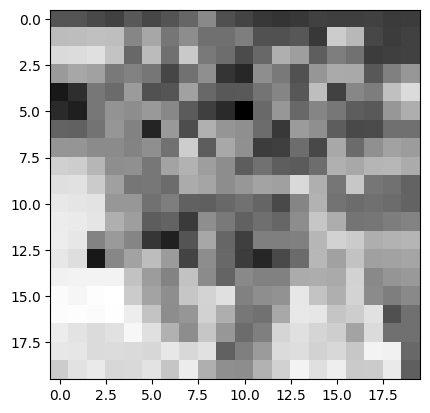

In [35]:
#image_path = "cat_dataset_1/images.cv_yfaip1vvxytk4pzkv6rhb/data/train/animal animal_faces cat cat_face/0AM9O53MDBX5.jpg"

image = cv2.imread(output2, 0)
image = cv2.resize(image, (20, 20))
plt.imshow(image, cmap='gray')

In [31]:
filters = {
    '|': np.array([[-1, 2, -1],
                   [-1, 2, -1],
                   [-1, 2, -1]]),
    '-': np.array([[-1, -1, -1],
                   [2, 2, 2],
                   [-1, -1, -1]]),
    '"': np.array([[2, 2, 2],
                   [-1, -1, -1],
                   [-1, -1, -1]]),
    '_': np.array([[-1, -1, -1],
                   [-1, -1, -1],
                   [2, 2, 2]]),
    '/': np.array([[-1, -1, 2],
                   [-1, 2, -1],
                   [2, -1, -1]]),
    '\\': np.array([[2, -1, -1],
                    [-1, 2, -1],
                    [-1, -1, 2]]),
    '^': np.array([[-1, 2, -1],
                   [2, -1, 2],
                   [-1, -1, -1]]),
    '>': np.array([[-1, 2, -1],
                   [-1, -1, 2],
                   [-1, 2, -1]]),
    '<': np.array([[-1, 2, -1],
                   [2, -1, -1],
                   [-1, 2, -1]]),
    '+': np.array([[-1.25, 1, -1.25],
                   [1, 1, 1],
                   [-1.25, 1, -1.25]]),
    'X': np.array([[1, -1.25, 1],
                   [-1.25, 1, -1.25],
                   [1, -1.25, 1]]),
    'o': np.array([[-1, 1.25, -1],
                   [1.25, -1, 1.25],
                   [-1, 1.25, -1]]),
    'O': np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]]),
    'L': np.array([[1, -1.25, -1.25],
                   [1, -1.25, -1.25],
                   [1, 1, 1]]),
    'J': np.array([[-1.25, -1.25, 1],
                   [-1.25, -1.25, 1],
                   [1, 1, 1]]),
    'T': np.array([[1, 1, 1],
                   [-1.25, 1, -1.25],
                   [-1.25, 1, -1.25]]),
    'U': np.array([[1, -3.5, 1],
                   [1, -3.5, 1],
                   [1, 1, 1]]),
    '7': np.array([[1, 1, 1],
                   [-1.25, -1.25, 1],
                   [-1.25, -1.25, 1]]),
    'Z': np.array([[1, 1, -1.25],
                   [-1.25, 1, -1.25],
                   [-1.25, 1, 1]]),
    'S': np.array([[-1.25, 1, 1],
                   [-1.25, 1, -1.25],
                   [1, 1, -1.25]]),
    'V': np.array([[1, -1.25, 1],
                   [1, -1.25, 1],
                   [-1.25, 1, -1.25]]),
    'A': np.array([[-2, 1, -2],
                   [1, -2, 1],
                   [1, 1, 1]]),
    'H': np.array([[1, -3.5, 1],
                   [1, 1, 1],
                   [1, -3.5, 1]]),
    'K': np.array([[1, -2, 1],
                   [1, 1, -2],
                   [1, -2, 1]]),
    'C': np.array([[1, 1, -1.25],
                   [1, -1.25, -1.25],
                   [1, 1, -1.25]]),
    'Y': np.array([[1.25, -1, 1.25],
                   [-1, 1.25, -1],
                   [-1, 1.25, -1]])
}

In [33]:
height, width = image.shape

padding = 1
border_color = [0, 0, 0]
padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=border_color)

filters_result = []

for filter in filters.values():
    filtered_image = cv2.filter2D(padded_image, -1, filter)
    filters_result.append(filtered_image)

filters_result = np.array(filters_result)

max_indices = np.argmax(filters_result, axis=0)

ascii_image = np.empty((height, width), dtype=str)

filter_chars = list(filters.keys())
for i in range(height):
    for j in range(width):
        ascii_image[i, j] = filter_chars[max_indices[i, j]]

for row in ascii_image:
    print("".join(row))

XOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
O____________________A_-_A--____________A_____A---------------------------------
O|___________________________________________CK^"""""""777""""""""""\<"""""""""O
O|____________________________________________OLO""""""7""""""""""O"^-^"""COO__O
O|______________J-----______-----------_________________O""""""7\_/H"""O"\LOJJ_U
O|______________J|"""ZHK__/-"""""""""""^--HL_____________/""O_______/\A_/A\UJ7_J
O|______________J|O7"""^H\</"O""""""""""""CHZ__________________----<_O\-CO|HO77-
O|______________SCU/7OO/"^\O_/^""""OOOO"O|_O/-C--H7|AH______--^"""7\L/|<CUS""O77
X|_____________ASOH^>H-^H"^\<O___O_O____O|A___L__OJ_LO____--O"""""7ZL/7ZL_CO__JJ
X|_A__________//CCOO"OZOO//"^\<H-\O_/H--H+H--H_________>/K<\U/|K"KO\|OJ|-|LU_JH+
X|-H----------C"OZU_____/<O""7\<O>VK<H7"""""TO---_AH---/<OXA\<"""^77|OH""|\___OX
X|""""""""""""""H|L-----<CC-KO>\-H"OYO__OZOO|/7O_HH>H"""\HAUA\O/O"JJ|OO_________
X|""""""""""""""O|H\OO"CC""O

In [221]:
a = np.array([[1, 1, -1.2],
                   [1, -1.2, -1.2],
                   [1, 1, -1.2]])

np.sum(a)

0.20000000000000018